# Semaine 1/6

#### Importation des librairies requises

In [1]:
import cv2
from skimage.filters import sobel
import tensorflow as tf
import requests
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
#from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

### Lire et redimmentionner l'image

In [2]:
src = cv2.imread("img2.jpeg")
size = (600, 600)
img = cv2.resize(src, size)
print(img.shape)

(600, 600, 3)


### Affichage d'une image

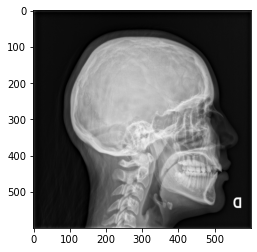

In [3]:
plt.imshow(img)
plt.show()

## Filtres passe-bas

Filtre ayant pour objet de couper les hautes fréquences. Cette opération a pour effet
de réduire le bruit et d’ajouter du flou (c-à-d. éliminer les détails de l’images)


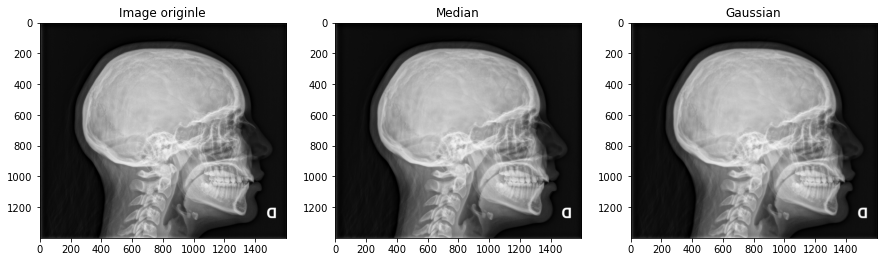

In [4]:
my_img = cv2.imread('img2.jpeg', 0)
# le filtre moyenneur
median_img = cv2.medianBlur(my_img, 5)
#filtre gaussien de taille 5 x 5 et d'écart-type 3
gaussian = cv2.GaussianBlur(my_img, (5, 5), 3)
plt.figure(figsize = (15, 13))
plt.subplot(2, 3, 1)
plt.imshow(my_img, cmap='gray')
plt.title("Image originle")
plt.subplot(2, 3, 2)
plt.imshow(median_img, cmap="gray")
plt.title("Median")
plt.subplot(2, 3, 3)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian")
plt.show()

## Filtres passe-haut

Filtre ayant pour objet de couper les basses fréquences. Cette opération a pour effet
d’accentuer les détails de l’image, les contours et le bruit. Toutes les régions uniformes
sont éliminées par cette procédure. 

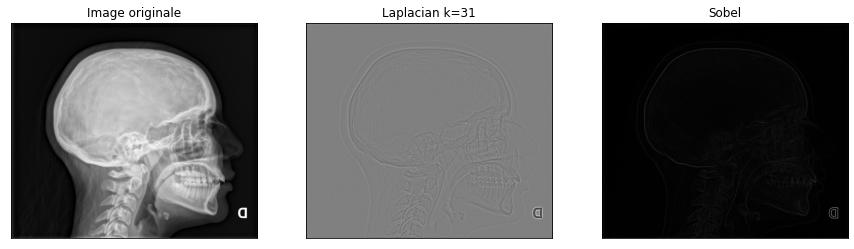

In [8]:
img = cv2.imread('img2.jpeg', 0)
# Filtre laplacien 
lap = cv2.Laplacian(img, cv2.CV_32F)
# Filtre laplacien k = 3
lap5 = cv2.Laplacian(img, cv2.CV_32F,ksize=31)
# Filtre Sobel
sobel_img = sobel(img)

plt.figure(figsize = (15, 13))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(lap5,cmap = 'gray')
plt.title('Laplacian k=31'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_img,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

## Détecteur de Canny

Algorithme :
1. Lissage de l’image avec un filtre gaussien.
2. Calcul du gradient (magnitude et angle)
3. Suppression des non-maxima sur l’image de magnitude
4. Seuillage par hystérésis


### Visualisation des resultats pour différents seuils haut et bas


In [9]:
cv2.namedWindow('window')

def nothing(x):
	pass

cv2.createTrackbar('lower', 'window', 0, 255, nothing)
cv2.createTrackbar('upper', 'window', 0, 255, nothing)

img = cv2.imread('img2.jpeg')
#img = cv2.GaussianBlur(img, (5, 5), 3)
img = cv2.resize(img, (800, 500))

# cap = cv2.VideoCapture(0)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

while True:
# 	_, img = cap.read()

# 	img = cv2.blur(img, (3,3))

# 	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	x = cv2.getTrackbarPos('lower', 'window')
	y = cv2.getTrackbarPos('upper', 'window')

	edge = cv2.Canny(img, x, y)
	cv2.imshow('window', edge)

	if cv2.waitKey(1) == 27:
		cv2.destroyAllWindows()
		break
        
#63
#120

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


### Autres résultats

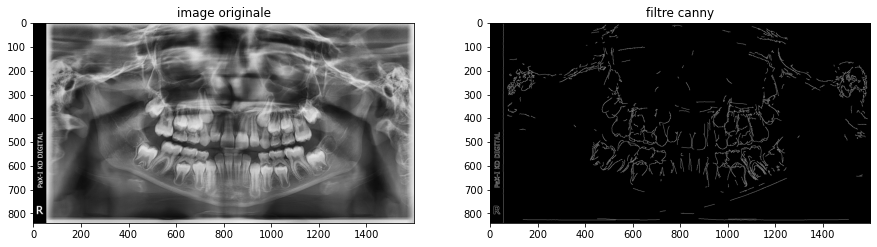

In [7]:
image = cv2.imread('p1.jpeg')
edges = cv2.Canny(image, 100, 200)
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = "gray")
plt.title('image originale')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap = "gray")
plt.title('filtre canny')
plt.show()

## Développement d'un algorithme afin de détecter le "point S"

### Objectif :

<img src="t1_ex.jpg" style = "width: 400px; height: 400px"/>

### Visualisation de l'histogramme de l'image originale

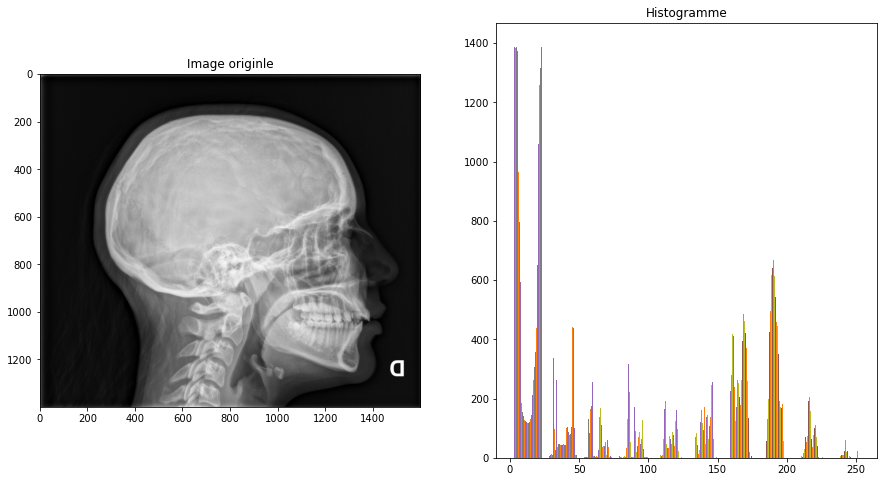

In [14]:
my_img = cv2.imread('img2.jpeg', 0)
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.imshow(my_img, cmap='gray')
plt.title("Image originle")
plt.subplot(1, 2, 2)
plt.hist(my_img)
plt.title("Histogramme")
plt.show()

### Développement d'un filtre pour Faire apparaitre les pixels désirés 

In [5]:
def mon_filtre(img):

    #img = cv2.imread('img2.jpeg', 0)
    img[img< 35] = 0
    img[img > 200] = 255
    return img
    #plt.imshow(img, cmap="gray")
    #plt.show()

### Chargement des images de teste

In [6]:
img1 = cv2.imread('img1.png', 0)

img2 = cv2.imread('img2.jpeg', 0)

img3 = cv2.imread('img3.jpg', 0)


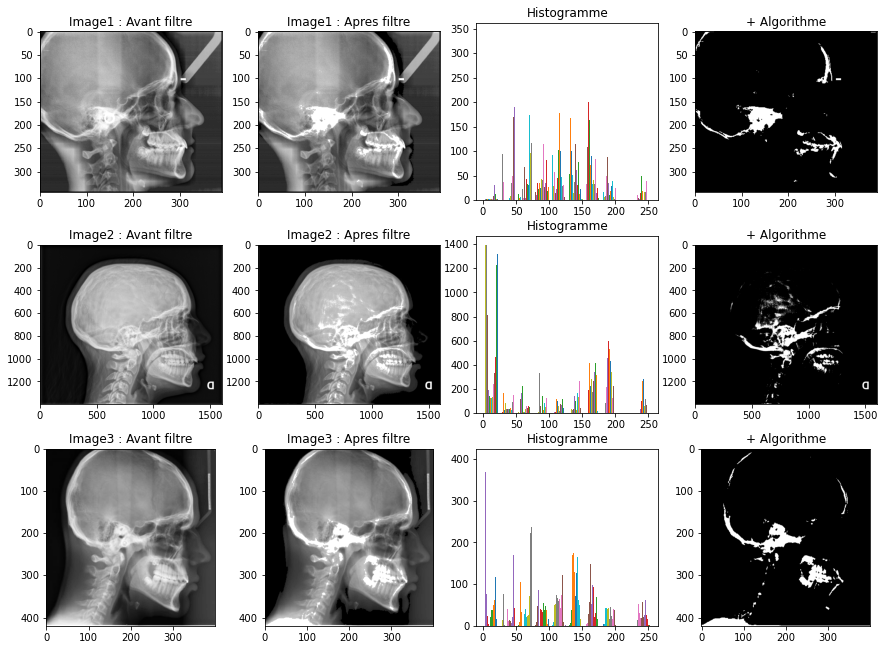

In [7]:
plt.figure(figsize = (15, 15))
plt.subplot(4, 4, 1)
plt.imshow(img1, cmap="gray")
plt.title("Image1 : Avant filtre")
plt.subplot(4, 4, 2)
filtre1 = mon_filtre(img1)
plt.imshow(filtre1, cmap = "gray")
plt.title("Image1 : Apres filtre")
plt.subplot(4, 4, 3)
plt.hist(filtre1)
plt.title("Histogramme")
#extraction
filtre1[filtre1 > 210] = 255
filtre1[filtre1<= 210] = 0
plt.subplot(4, 4, 4)
plt.imshow(filtre1, cmap = "gray")
plt.title("+ Algorithme")

plt.subplot(4, 4, 5)
plt.imshow(img2, cmap="gray")
plt.title("Image2 : Avant filtre")
plt.subplot(4, 4, 6)
filtre2 = mon_filtre(img2)
plt.imshow(filtre2, cmap = "gray")
plt.title("Image2 : Apres filtre")
plt.subplot(4, 4, 7)
plt.hist(filtre2)
plt.title("Histogramme")
#extraction
filtre2[filtre2 > 210] = 255
filtre2[filtre2<= 210] = 0
plt.subplot(4, 4, 8)
plt.imshow(filtre2, cmap = "gray")
plt.title("+ Algorithme")

plt.subplot(4, 4, 9)
plt.imshow(img3, cmap="gray")
plt.title("Image3 : Avant filtre")
plt.subplot(4, 4, 10)
filtre3 = mon_filtre(img3)
plt.imshow(filtre3, cmap = "gray")
plt.title("Image3 : Apres filtre")
plt.subplot(4, 4, 11)
plt.hist(filtre3)
plt.title("Histogramme")
#extraction
filtre3[filtre3 > 210] = 255
filtre3[filtre3<= 210] = 0
plt.subplot(4, 4, 12)
plt.imshow(filtre3, cmap = "gray")
plt.title("+ Algorithme")

plt.show()

### Remarques :

* Difficulté de trouver des caractéristiques permettant de développer un algorithme capable de reconnaitre "le point S"
* La différence au niveau du volume lumineux et la taille des images ont compliqué la tâche

In [21]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

print(model.summary()) 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_30 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        1792      
                                                                 
 zero_padding2d_31 (ZeroPadd  (None, 77, 77, 64)       0         
 ing2D)                                                          
                                                                 
 conv2d_31 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                      

C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_30 (3, 3, 3, 64)


## Les différents filtres de convolution

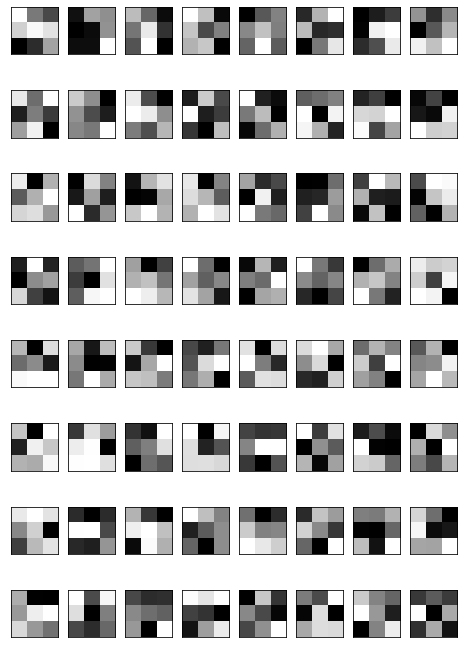

In [23]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_30_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_30 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        1792      
                                                                 
 zero_padding2d_31 (ZeroPadd  (None, 77, 77, 64)       0         
 ing2D)                                                          
                                                                 
 conv2d_31 (Conv2D)          (None, 25, 25, 64)        36928     
                                                             

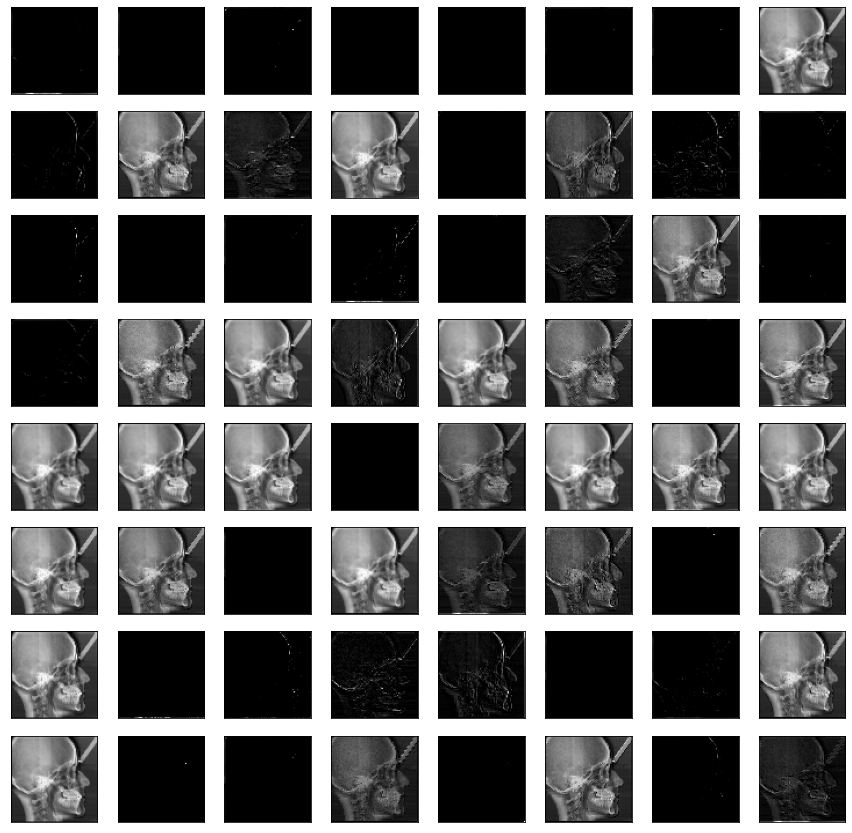

    ======================================== PROCHAINE COUCHE ==============================================


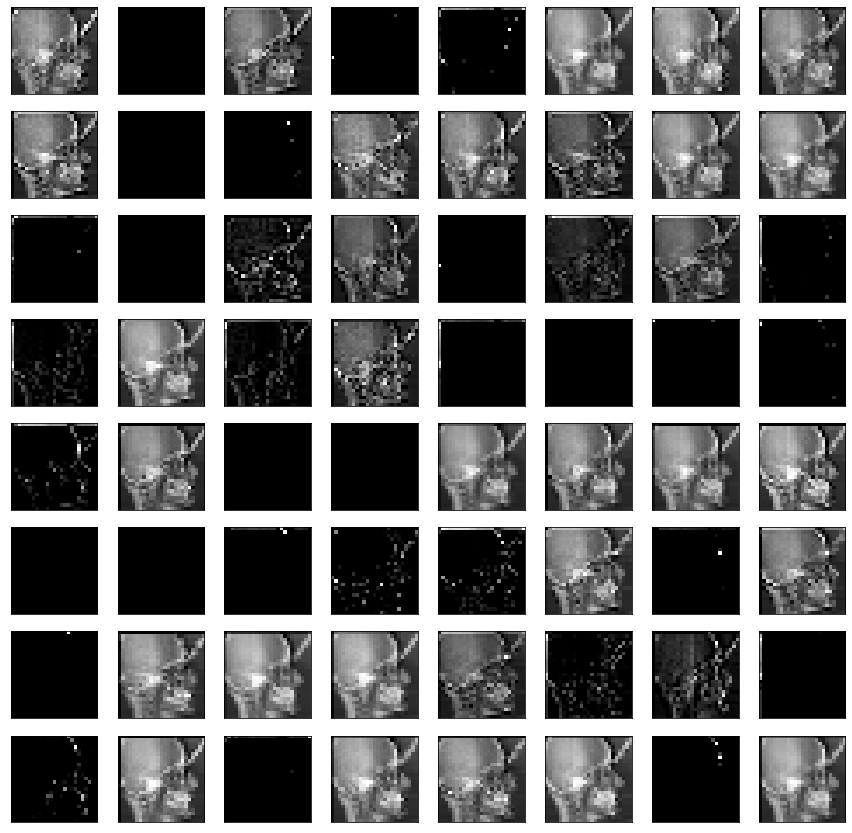

    ======================================== PROCHAINE COUCHE ==============================================


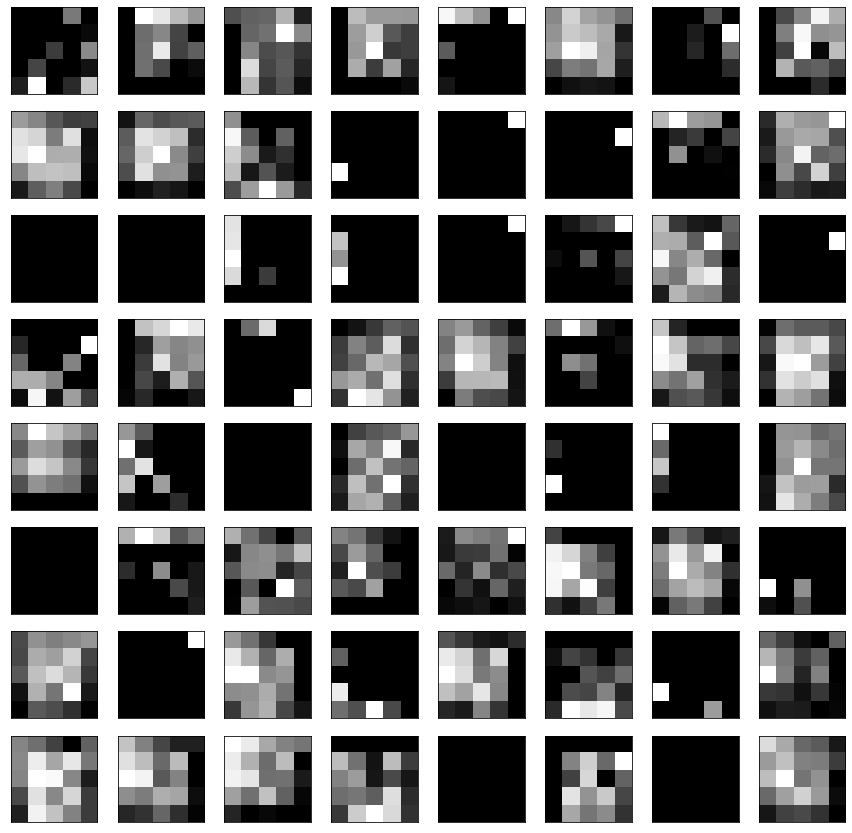

In [24]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img
img = load_img('img1.png', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    print("    ======================================== PROCHAINE COUCHE ==============================================")
    fig=plt.figure(figsize=(15, 15))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [4]:
import os

In [5]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        if img is not None:
            images.append(img)
    return images

In [6]:
img_list=load_images_from_folder("Desktop/teleradiographie_de_profil_22")

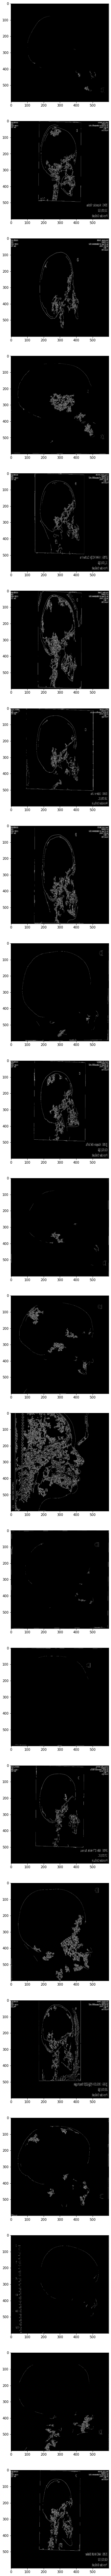

In [31]:
plt.figure(figsize = (150, 150))
for i in range(len(img_list)):
    plt.subplot(len(img_list) + 1, 1 , i +1  )
    edge = cv2.Canny(img_list[i], 219, 0)
    edge = cv2.resize(edge, (600, 600))
    plt.imshow(edge, cmap = "gray")
plt.show()